In [1]:
amount = float(input("Enter the monthly SIP amount: "))
yearlyRate = float(input("Enter the yearly rate of return: "))
years = int(input("Enter the number of years: "))
monthlyRate = yearlyRate/12/100
months = years * 12
futureValue = amount * ((((1 + monthlyRate)**(months))-1) * (1 + monthlyRate))/monthlyRate
futureValue = round(futureValue)
print("The expected amount you will get is:",futureValue)

Enter the monthly SIP amount:  500
Enter the yearly rate of return:  10
Enter the number of years:  10


The expected amount you will get is: 103276


In [106]:
# Import the required libraries and dependencies
import os
from pathlib import Path
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import hvplot.pandas
from MCForecastTools import MCSimulation

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

In [107]:
# Load the environment variables from the .env file
# by calling the load_dotenv function
load_dotenv()

True

In [132]:
# Current amount of shares held in the stock (MSFT) portfolio.
msft_shares = 100 
f_shares = 100
jpm_shares = 100
mo_shares = 100
t_shares = 100
xom_shares = 100
lumn_shares = 100
aapl_shares = 100

#### 1: Create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.
#### 2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [133]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [134]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [135]:
# Set the tickers
tickers = ["MSFT","F","JPM","MO","T","XOM","LUMN","AAPL"]


In [136]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [137]:
# Format current date as ISO format
start_date = pd.Timestamp("today", tz="America/New_York").isoformat()
end_date = pd.Timestamp("today", tz="America/New_York").isoformat()

#### 4: Get the current closing prices by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [138]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
current_stock_price_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Review the first 5 rows of the Alpaca DataFrame
current_stock_price_df.head()

AAPL                                        F  \
                             open    high     low   close    volume   open   
time                                                                         
2021-11-04 00:00:00-04:00  151.62  152.43  150.64  150.96  49782226  18.92   

                                                          ...      T         \
                           high    low  close     volume  ...   open   high   
time                                                      ...                 
2021-11-04 00:00:00-04:00  19.5  18.72  19.41  146548073  ...  25.13  25.25   

                                                       XOM                \
                             low   close    volume    open   high    low   
time                                                                       
2021-11-04 00:00:00-04:00  24.54  24.807  59326851  64.675  64.89  63.83   

                                            
                           close    volume  
time                                        
2021-11-04 00:00:00-04:00  64.42  15047956  

[1 rows x 40 columns]

#### 5: Navigating the Alpaca response DataFrame, select the closing prices, and store them as variables.

In [139]:
# Access the closing price for MSFT from the Alpaca DataFrame
# Converting the value to a floating point number
msft_close_price = float(current_stock_price_df["MSFT"]["close"])

# Print the MSFT closing price
print(msft_close_price)

336.46


In [140]:
# Access the closing price for F from the Alpaca DataFrame
# Converting the value to a floating point number
f_close_price = float(current_stock_price_df["F"]["close"])

# Print the MSFT closing price
print(f_close_price)

19.41


In [141]:
# Access the closing price for JPM from the Alpaca DataFrame
# Converting the value to a floating point number
jpm_close_price = float(current_stock_price_df["JPM"]["close"])

# Print the MSFT closing price
print(jpm_close_price)

168.29


In [142]:
# Access the closing price for MO from the Alpaca DataFrame
# Converting the value to a floating point number
mo_close_price = float(current_stock_price_df["MO"]["close"])

# Print the MSFT closing price
print(mo_close_price)

44.62


In [143]:
# Access the closing price for T from the Alpaca DataFrame
# Converting the value to a floating point number
t_close_price = float(current_stock_price_df["T"]["close"])

# Print the MSFT closing price
print(t_close_price)

24.807


In [146]:
# Access the closing price for XOM from the Alpaca DataFrame
# Converting the value to a floating point number
xom_close_price = float(current_stock_price_df["XOM"]["close"])

# Print the MSFT closing price
print(xom_close_price)

64.42


In [147]:
# Access the closing price for LUMN from the Alpaca DataFrame
# Converting the value to a floating point number
lumn_close_price = float(current_stock_price_df["LUMN"]["close"])

# Print the MSFT closing price
print(lumn_close_price)

13.73


In [148]:
# Access the closing price for AAPL from the Alpaca DataFrame
# Converting the value to a floating point number
aapl_close_price = float(current_stock_price_df["AAPL"]["close"])

# Print the MSFT closing price
print(aapl_close_price)

150.96


#### 6: Calculate the value, in US dollars, of the current amount of shares of the stock portfolio, and print the results.

In [177]:
# Calculate the current value of the portfolio
msft_value = round(msft_shares * msft_close_price, 3)
f_price = round(f_shares * f_close_price, 3)
jpm_price = round(jpm_shares * jpm_close_price, 3)
mo_price = round(mo_shares * mo_close_price, 3)
t_price = round(t_shares * t_close_price, 3)
xom_price = round(xom_shares * xom_close_price, 3)
lumn_price = round(lumn_shares * lumn_close_price, 3)
aapl_price = round(aapl_shares * aapl_close_price, 3)

# Print the current value of the bond portfolio
print(f"The value of your stocks:\n Microsoft (MSFT): ${msft_value}\n Ford (F): ${f_price}\n JPMorgan (JPM): ${jpm_price}")
print(f" Altria (M)O: ${mo_price}\n AT&T (T): ${t_price}")
print(f" Exon Mobile (XOM): ${xom_price}\n Lumen Tech. (LUMN): ${lumn_price}\n Apple (AAPL): ${aapl_price}")

The value of your stocks:
 Microsoft (MSFT): $100938.0
 Ford (F): $1941.0
 JPMorgan (JPM): $16829.0
 Altria (M)O: $4462.0
 AT&T (T): $2480.7
 Exon Mobile (XOM): $6442.0
 Lumen Tech. (LUMN): $1373.0
 Apple (AAPL): $15096.0


#### Step 1: Make an API call via the Alpaca SDK to get 10 years of historical closing prices for all stocks.

In [158]:
# Set start and end dates of 10 years back from your current date
start_date = pd.Timestamp("2010-01-01", tz="America/New_York").isoformat() 
end_date = pd.Timestamp("today", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [159]:
# Use the Alpaca get_barset function to make the API call to get the 5 years worth of pricing data
# The tickers and timeframe parameters should have been set early of this activity 
# The start and end dates should be updated with the information set above
# Adding the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_barset(tickers, timeframe, start= start_date, end= end_date, limit= limit_rows).df


# Display both the first and last five rows of the DataFrame
prices_df.head()


AAPL                                          F  \
                             open      high     low   close    volume   open   
time                                                                           
2017-11-15 00:00:00-05:00  169.97  170.3197  168.38  169.09  23163666  11.97   
2017-11-16 00:00:00-05:00  171.18  171.8700  170.30  171.10  17300298  12.00   
2017-11-17 00:00:00-05:00  171.04  171.3900  169.64  170.11  17093245  12.02   
2017-11-20 00:00:00-05:00  170.29  170.5600  169.56  169.99  11894851  12.03   
2017-11-21 00:00:00-05:00  170.78  173.7000  170.78  173.13  18672611  12.14   

                                                              ...      T  \
                             high     low    close    volume  ...   open   
time                                                          ...          
2017-11-15 00:00:00-05:00  12.030  11.870  12.0000  26283567  ...  34.02   
2017-11-16 00:00:00-05:00  12.050  11.930  12.0400  23048914  ...  33.86   
2017-11-17 00:00:00-05:00  12.060  11.985  12.0057  27517629  ...  34.43   
2017-11-20 00:00:00-05:00  12.150  12.020  12.1300  30774099  ...  34.55   
2017-11-21 00:00:00-05:00  12.225  12.120  12.1250  22340387  ...  34.60   

                                                            XOM         \
                            high    low  close    volume   open   high   
time                                                                     
2017-11-15 00:00:00-05:00  34.20  33.65  33.83  28145521  81.75  82.09   
2017-11-16 00:00:00-05:00  34.66  33.81  34.52  34297278  80.44  80.85   
2017-11-17 00:00:00-05:00  34.88  34.35  34.51  27594687  80.32  80.66   
2017-11-20 00:00:00-05:00  34.90  34.44  34.64  24292863  80.23  80.64   
2017-11-21 00:00:00-05:00  34.75  34.29  34.34  30638639  80.69  81.25   

                                                   
                              low  close   volume  
time                                               
2017-11-15 00:00:00-05:00  81.150  81.22  7011638  
2017-11-16 00:00:00-05:00  80.145  80.55  8311612  
2017-11-17 00:00:00-05:00  80.160  80.24  7007129  
2017-11-20 00:00:00-05:00  80.010  80.55  6531600  
2017-11-21 00:00:00-05:00  80.640  80.89  5845429  

[5 rows x 40 columns]

## Pick closing prices and compute the daily returns

In [160]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the stocks
df_closing_prices["MSFT"] = prices_df["MSFT"]["close"]
df_closing_prices["JPM"] = prices_df["JPM"]["close"]
df_closing_prices["F"] = prices_df["F"]["close"]
df_closing_prices["MO"] = prices_df["MO"]["close"]
df_closing_prices["T"] = prices_df["T"]["close"]
df_closing_prices["XOM"] = prices_df["XOM"]["close"]
df_closing_prices["LUMN"] = prices_df["LUMN"]["close"]
df_closing_prices["AAPL"] = prices_df["AAPL"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

display(df_closing_prices.head())
display(df_closing_prices.tail())

,MSFT,JPM,F,MO,T,XOM,LUMN,AAPL
2017-11-15,82.99,98.19,12.0000,65.26,33.83,81.22,NaN,169.09
2017-11-16,83.19,98.50,12.0400,65.87,34.52,80.55,NaN,171.10
2017-11-17,82.37,98.12,12.0057,66.41,34.51,80.24,NaN,170.11
2017-11-20,82.54,99.02,12.1300,65.85,34.64,80.55,NaN,169.99
2017-11-21,83.73,98.98,12.1250,65.66,34.34,80.89,NaN,173.13


,MSFT,JPM,F,MO,T,XOM,LUMN,AAPL
2021-10-29,331.64,169.94,17.0800,44.11,25.250,64.47,11.85,149.80
2021-11-01,329.38,169.76,17.9400,44.05,25.380,65.62,12.08,148.99
2021-11-02,333.26,170.49,18.0200,44.16,25.230,64.82,12.23,150.00
2021-11-03,333.98,170.55,18.6362,44.96,25.175,63.93,12.18,151.49
2021-11-04,336.46,168.29,19.4100,44.62,24.807,64.42,13.73,150.96


In [161]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head()

,MSFT,JPM,F,MO,T,XOM,LUMN,AAPL
2020-09-21,0.010925,-0.031012,-0.048476,-0.025360,-0.010128,-0.020172,-0.045539,0.033114
2020-09-22,0.023391,-0.010808,-0.014556,-0.006953,-0.004452,-0.024430,0.000000,0.015164
2020-09-23,-0.032742,-0.016124,-0.019941,-0.015824,-0.022708,-0.032358,-0.021422,-0.040877
2020-09-24,0.012912,-0.000970,0.002261,0.010279,0.006385,-0.002035,0.009950,0.009060
2020-09-25,0.022591,0.008742,-0.021053,-0.001826,0.000000,0.009470,0.005911,0.037694


In [162]:
# Generate descriptive statistics
df_daily_returns.describe()

,MSFT,JPM,F,MO,T,XOM,LUMN,AAPL
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,0.001917,0.002022,0.003794,0.000503,-0.000467,0.002174,0.001344,0.001370
std,0.014047,0.016687,0.025361,0.014429,0.012066,0.022260,0.031524,0.017270
min,-0.048980,-0.032453,-0.095257,-0.066065,-0.058020,-0.052213,-0.223924,-0.049074
25%,-0.005341,-0.008165,-0.012346,-0.006762,-0.007716,-0.012161,-0.011610,-0.008257
50%,0.001052,0.000602,0.000580,0.000610,0.000000,-0.000501,0.000000,0.001090
75%,0.010787,0.011645,0.018868,0.009195,0.006385,0.014335,0.013730,0.012321
max,0.049486,0.135728,0.086985,0.045817,0.058754,0.126410,0.280070,0.063601


In [163]:
average_daily_returns = df_daily_returns.mean()
average_daily_returns

MSFT    0.001917
JPM     0.002022
F       0.003794
MO      0.000503
T      -0.000467
XOM     0.002174
LUMN    0.001344
AAPL    0.001370
dtype: float64

In [164]:
# Calculate the annual average return data for the stocks
# Use 252 as the number of trading days in the year
average_annual_return = (df_daily_returns.mean() * 252) *100

average_annual_return

MSFT    48.312845
JPM     50.962294
F       95.599328
MO      12.678657
T      -11.764194
XOM     54.785640
LUMN    33.870000
AAPL    34.521234
dtype: float64

In [165]:
cumulative_returns= (1 + df_daily_returns).cumprod()
cumulative_returns.tail()

,MSFT,JPM,F,MO,T,XOM,LUMN,AAPL
2021-10-29,1.654477,1.727911,2.365651,1.107457,0.872796,1.733997,1.101301,1.405253
2021-11-01,1.643203,1.726080,2.484765,1.105950,0.877290,1.764927,1.122677,1.397655
2021-11-02,1.662559,1.733503,2.495845,1.108712,0.872105,1.743410,1.136617,1.407129
2021-11-03,1.666151,1.734113,2.581191,1.128797,0.870204,1.719473,1.131970,1.421107
2021-11-04,1.678523,1.711134,2.688366,1.120261,0.857484,1.732652,1.276022,1.416135


#### Use the default Pandas `plot` to visualize the cumulative return values 

<AxesSubplot:title={'center':'Cumulative returns of the Whales Funds NAV and S&P 500'}>

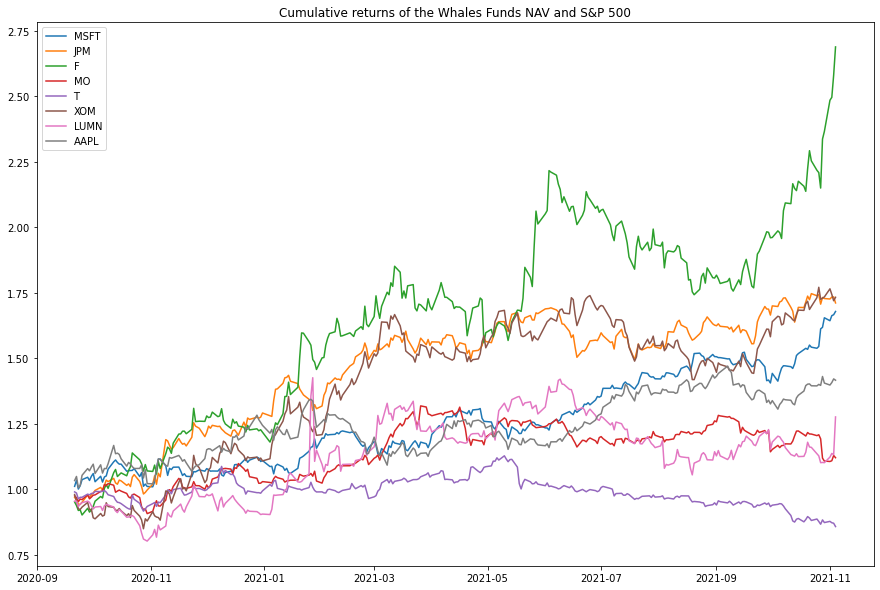

In [166]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
cumulative_returns.plot(figsize= (15,10), title= "Cumulative returns of the Whales Funds NAV and S&P 500")


## Use the `read_csv` function and the `Path` module to read the dividends csv file into a Pandas DataFrame.  Review the first five rows of the DataFrame by using the `head` function.

In [167]:
# Import the data by reading in the CSV file
# Review the first 5 rows of the DataFrame
msft_div = pd.read_csv(Path("Resources/msft_dividends.csv"))
f_div = pd.read_csv(Path("Resources/F_dividends.csv"))
jpm_div = pd.read_csv(Path("Resources/JPM_dividends.csv"))
mo_div = pd.read_csv(Path("Resources/MO_dividends.csv"))
t_div = pd.read_csv(Path("Resources/T_dividends.csv"))
xom_div = pd.read_csv(Path("Resources/XOM (1).csv"))
lumn_div = pd.read_csv(Path("Resources/LUMN.csv"))
aapl_div = pd.read_csv(Path("Resources/AAPL.csv"))

display(msft_div.head())
display(f_div.head())
display(jpm_div.head())
display(mo_div.head())
display(t_div.head())
display(xom_div.head())
display(lumn_div.head())
display(aapl_div.head())


,Announced,Period,Amount,Yield,Ex-Dividend,Record Date,Payable Date
0,9/14/2021,quarterly,$0.62,0.83%,11/17/2021,11/18/2021,12/9/2021
1,6/16/2021,quarterly,$0.56,0.87%,8/18/2021,8/19/2021,9/9/2021
2,3/16/2021,quarterly,$0.56,0.94%,5/19/2021,5/20/2021,6/10/2021
3,12/2/2020,quarterly,$0.56,1.04%,2/17/2021,2/18/2021,3/11/2021
4,9/15/2020,quarterly,$0.56,1.07%,11/18/2020,11/19/2020,12/10/2020


,Ex-Div. Date,Amount,Type,Yield,Decl. Date,Rec. Date,Pay. Date
0,11/18/2021,$0.10,Quarter,2.20%,10/27/2021,11/19/2021,12/1/2021
1,10/21/2019,$0.15,Quarter,6.60%,10/10/2019,10/22/2019,12/2/2019
2,7/22/2019,$0.15,Quarter,6%,7/11/2019,7/23/2019,9/3/2019
3,4/23/2019,$0.15,Quarter,6.30%,4/8/2019,4/24/2019,6/3/2019
4,10/22/2018,$0.15,Quarter,7.10%,10/11/2018,10/23/2018,12/3/2018


,Ex-Div. Date,Amount,Type,Yield,Change,Decl. Date,Rec. Date,Pay. Date,Details
0,10/5/2021,$1.00,Quarter,2.40%,11.10%,9/21/2021,10/6/2021,10/31/2021,Details
1,1/5/2021,$0.90,Quarter,2.90%,NaN,12/8/2020,1/6/2021,1/31/2021,Details
2,10/5/2020,$0.90,Quarter,3.60%,NaN,9/15/2020,10/6/2020,10/31/2020,Details
3,7/2/2020,$0.90,Quarter,3.90%,NaN,5/18/2020,7/6/2020,7/31/2020,Details
4,4/3/2020,$0.90,Quarter,4.30%,NaN,3/17/2020,4/6/2020,4/30/2020,Details


,Ex-Div. Date,Amount,Type,Yield,Change,Decl. Date,Rec. Date,Pay. Date,Details
0,9/14/2021,$0.90,Quarter,7.40%,4.70%,8/26/2021,9/15/2021,10/12/2021,Details
1,3/24/2021,$0.86,Quarter,6.90%,NaN,2/26/2021,3/25/2021,4/30/2021,Details
2,12/24/2020,$0.86,Quarter,8.20%,NaN,12/16/2020,12/28/2020,1/11/2021,Details
3,9/14/2020,$0.86,Quarter,8%,2.40%,7/28/2020,9/15/2020,10/9/2020,Details
4,6/12/2020,$0.84,Quarter,8.60%,NaN,5/14/2020,6/15/2020,7/10/2020,Details


,Ex-Div. Date,Amount,Type,Yield,Change,Decl. Date,Rec. Date,Pay. Date,Details
0,10/7/2021,$0.52,Quarter,7.70%,NaN,9/23/2021,10/11/2021,11/1/2021,Details
1,7/8/2021,$0.52,Quarter,7.40%,NaN,6/25/2021,7/9/2021,8/2/2021,Details
2,4/8/2021,$0.52,Quarter,6.90%,NaN,3/26/2021,4/9/2021,5/3/2021,Details
3,1/8/2021,$0.52,Quarter,7.20%,NaN,12/11/2020,1/11/2021,2/1/2021,Details
4,10/8/2020,$0.52,Quarter,7.30%,NaN,9/25/2020,10/12/2020,11/2/2020,Details


,Date,Dividends
0,1980-05-07,0.08125
1,1980-08-07,0.08750
2,1980-11-05,0.09375
3,1981-02-03,0.09375
4,1981-05-11,0.09375


,Date,Dividends
0,1987-03-02,0.027654
1,1987-05-22,0.028313
2,1987-08-31,0.028313
3,1987-11-20,0.028313
4,1988-02-25,0.028971


,Date,Dividends
0,1987-05-11,0.000536
1,1987-08-10,0.000536
2,1987-11-17,0.000714
3,1988-02-12,0.000714
4,1988-05-16,0.000714


#### Use the `str.replace` function to remove the dollar signs ($) from the values in the Amount column.

In [169]:
msft_div.loc[:, "Amount"]= msft_div.loc[:, "Amount"].str.replace("$", "")
f_div.loc[:, "Amount"]= f_div.loc[:, "Amount"].str.replace("$", "")
jpm_div.loc[:, "Amount"]= jpm_div.loc[:, "Amount"].str.replace("$", "")
mo_div.loc[:, "Amount"]= mo_div.loc[:, "Amount"].str.replace("$", "")
t_div.loc[:, "Amount"]= t_div.loc[:, "Amount"].str.replace("$", "")


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/dev/lib/pyt

#### Convert the data type of the column to a `float`.

In [170]:
msft_div.loc[:, "Amount"]= msft_div.loc[:, "Amount"].astype("float")
f_div.loc[:, "Amount"]= t_div.loc[:, "Amount"].astype("float")
jpm_div.loc[:, "Amount"]= jpm_div.loc[:, "Amount"].astype("float")
mo_div.loc[:, "Amount"]= mo_div.loc[:, "Amount"].astype("float")
t_div.loc[:, "Amount"]= t_div.loc[:, "Amount"].astype("float")
xom_div.loc[:, "Dividends"]= xom_div.loc[:, "Dividends"].astype("float")
lumn_div.loc[:, "Dividends"]= lumn_div.loc[:, "Dividends"].astype("float")
aapl_div.loc[:, "Dividends"]= aapl_div.loc[:, "Dividends"].astype("float")

msft_div.dtypes

Announced        object
Period           object
Amount          float64
Yield            object
Ex-Dividend      object
Record Date      object
Payable Date     object
dtype: object

In [171]:
msft_div_slices = msft_div.loc[:, "Amount"] * msft_shares
f_div_slices = f_div.loc[:, "Amount"] * f_shares
jpm_div_slices = jpm_div.loc[:, "Amount"] * jpm_shares
mo_div_slices = mo_div.loc[:, "Amount"] * mo_shares
t_div_slices = t_div.loc[:, "Amount"] * t_shares
xom_div_slices = xom_div.loc[:, "Dividends"] * xom_shares
lumn_div_slices = lumn_div.loc[:, "Dividends"] * lumn_shares
aapl_div_slices = aapl_div.loc[:, "Dividends"] * aapl_shares

display(msft_div_slices.head())
display(f_div_slices.head())
display(jpm_div_slices.head())
display(mo_div_slices.head())
display(t_div_slices.head())
display(xom_div_slices.head())
display(lumn_div_slices.head())
display(aapl_div_slices.head())

0    186.0
1    168.0
2    168.0
3    168.0
4    168.0
Name: Amount, dtype: float64

0    52.0
1    52.0
2    52.0
3    52.0
4    52.0
Name: Amount, dtype: float64

0    100.0
1     90.0
2     90.0
3     90.0
4     90.0
Name: Amount, dtype: float64

0    90.0
1    86.0
2    86.0
3    86.0
4    84.0
Name: Amount, dtype: float64

0    52.0
1    52.0
2    52.0
3    52.0
4    52.0
Name: Amount, dtype: float64

0    8.125
1    8.750
2    9.375
3    9.375
4    9.375
Name: Dividends, dtype: float64

0    2.7654
1    2.8313
2    2.8313
3    2.8313
4    2.8971
Name: Dividends, dtype: float64

0    0.0536
1    0.0536
2    0.0714
3    0.0714
4    0.0714
Name: Dividends, dtype: float64

In [178]:
msft_div_slices_average = round(msft_div_slices.mean(),2)
Yearly_msft_div= msft_div_slices_average * 4
monthly_msft_div = Yearly_msft_div / 12

f_div_slices_average = round(f_div_slices.mean(),2)
Yearly_f_div= f_div_slices_average * 4
monthly_f_div = Yearly_f_div / 12

jpm_div_slices_average = round(jpm_div_slices.mean(),2)
Yearly_jpm_div= jpm_div_slices_average * 4
monthly_jpm_div = Yearly_jpm_div / 12

mo_div_slices_average = round(mo_div_slices.mean(),2)
Yearly_mo_div= mo_div_slices_average * 4
monthly_mo_div = Yearly_mo_div / 12

t_div_slices_average = round(t_div_slices.mean(),2)
Yearly_t_div= t_div_slices_average * 4
monthly_t_div = Yearly_t_div / 12

xom_div_slices_average = round(xom_div_slices.mean(),2)
Yearly_xom_div= xom_div_slices_average * 4
monthly_xom_div = Yearly_xom_div / 12

lumn_div_slices_average = round(lumn_div_slices.mean(),2)
Yearly_lumn_div= lumn_div_slices_average * 4
monthly_lumn_div = Yearly_lumn_div / 12

aapl_div_slices_average = round(aapl_div_slices.mean(),2)
Yearly_aapl_div= aapl_div_slices_average * 4
monthly_aapl_div = Yearly_aapl_div / 12

print(f"The average yearly dividend for your numbers of share are::\n Microsoft (MSFT): ${Yearly_msft_div}")
print(f" Ford (F): ${Yearly_f_div}\n JPMorgan (JPM): ${Yearly_jpm_div}\n Altria (MO): ${Yearly_mo_div}")
print(f" AT&T (T): ${Yearly_t_div}\n Exon Mobile (XOM): ${Yearly_xom_div}\n LumenTech (LUMN): ${Yearly_lumn_div}\n Apple (AAPL): ${Yearly_aapl_div}")


The average yearly dividend for your numbers of share are::
 Microsoft (MSFT): $553.0
 Ford (F): $200.32
 JPMorgan (JPM): $224.96
 Altria (MO): $259.52
 AT&T (T): $200.32
 Exon Mobile (XOM): $134.56
 LumenTech (LUMN): $94.36
 Apple (AAPL): $31.68


## Divedend Re-Investment plan calculation 

In [7]:

def sip(investment, tenure, interest, amount=0, is_year=True, is_percent=True, show_amount_list=False):
    tenure = tenure*12 if is_year else tenure
    interest = interest/100 if is_percent else interest
    interest /= 12
    amount_every_month = {}
    for month in range(tenure):
        amount = (amount + investment)*(1+interest)
        amount_every_month[month+1] = amount
    return {'Amount after invexting your dividends back into the chosen stock': amount, 'Amount every month': amount_every_month} if show_amount_list else {'Amount after investing your dividends back into the chosen stock': amount} 

In [8]:
# (monthly amount, years, percent returned)
SIP_maturity = sip(12, 1, 3)

print(SIP_maturity)


{'Amount after investing your dividends back into the chosen stock': 146.36158466779716}


In [3]:
years = input()

 3
